# The first question addressed in this notebook is the gender-ratio of the Nobel Prize winners over all decades since the Nobel Prize first started in the 1900s.  

* Reading the csv file as a dataframe.

In [3]:
import pandas as pd
import numpy as np
import datetime # to handle date/time attributes
from os import listdir # os is a module for interacting with the OS
from os.path import isfile, join # to verify file object, and concatenate paths
import glob # to find pathnames matching a specific pattern
import re # regular expressions :)
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("new_nobel.csv")
df

FileNotFoundError: [Errno 2] File b'new_nobel.csv' does not exist: b'new_nobel.csv'

* Dropping the first column as it is an unnecessary column.

In [1]:
df = df.drop(df.columns[0] ,  axis='columns')
df

NameError: name 'df' is not defined

* Dropping all the records that indicate an organization (having the sex as org).

In [131]:
df.drop(df[df['Sex'] == 'org'].index, inplace = True) 
df

,Year,Category,Prize Share,Laureate ID,Laureate Type,FullName,BirthDate,Birth City,Birth Country,Sex,OrganizationName,OrganizationCountry


* Making sure that there are no records with sex as "org".

In [ ]:
df.loc[df['Sex'] == 'org']

In [132]:
 df.groupby(['Sex']).size()

Sex
Female     50
Male      893
dtype: int64

* Creating a column with boolean type to indicate whether the gender is male or female. This column assigns true to Female and false to Male.

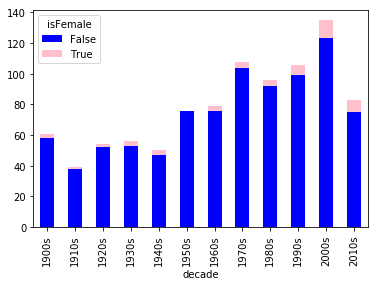

In [139]:
df['isFemale'] = df[['Sex']] != 'Male'

# Dividing the data into bins of 10 years.
bins1 = [1900, 1910, 1920, 1930, 1940, 1950, 1960,1970, 1980, 1990, 2000, 2010, 2020]
labels1 = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

#Cutting the Year column of our dataframe df into bins given the above array of bins and array of labels for each bin.
df['decade'] = pd.cut(df['Year'], bins =bins1, labels =labels1)
df

* Creating a bar chart with the decade column as the horizontal axis and the isFemale boolean as the y-axis, showing the number of female and male Nobel Prize winners in each decade from the 1900s till the 2010s. As shown in the key, the blue color represents the male participants and the pink color represents the female participants.

In [ ]:
gender_ratio_time = pd.crosstab([df.decade], df.isFemale.astype(bool))
gender_ratio_time.plot(kind='bar', stacked=True, color=['blue','pink'], grid=False)

**Our Findings:
   This plot has shown us that the ratio between males and females is almost the same over all the years; the percentage of male winners is much greater than female winners. It is also deducable that the number of winners is almost increasing over the decades.**

# The second question addressed in this notebook is the gender-ratio of the Nobel Prize winners in each category.  

* Creating a bar chart with the Category column as the horizontal axis and the isFemale boolean as the y-axis, showing the number of female and male Nobel Prize winners in each category (e.g Chemistry, Economics, Literature.. etc.) As shown in the key, the blue color represents the male participants and the pink color represents the female participants.  

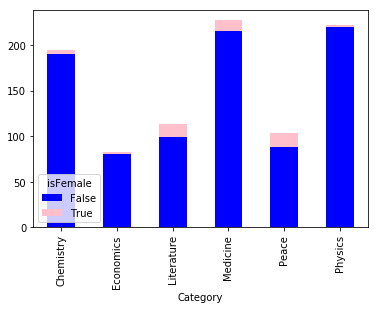

In [141]:
gender_ratio_field = pd.crosstab([df.Category], df.isFemale.astype(bool))
gender_ratio_field.plot(kind='bar', stacked=True, color=['blue','pink'], grid=False)


**Our Findings:
   This plot has shown us several findings. Firstly, it shows that the number of males is significatly greater than females in all categories. The plot also shows us the differences between the number of male Nobel Prize Winners in each category for all the years, with the sciences Medicine, Physics and Chemistry having more winners than Literature, Peace and Economics. As for the females, the number of females is greater in Medicine, Peace and Literature than in the other 3 categories.**